<a href="https://colab.research.google.com/github/secondaryfeed/mlzoomcamp-code/blob/main/mlzoomcamp_homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [62]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'
!wget $data

--2021-09-20 05:58:18--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv.1’

AB_NYC_2019.csv.1   100%[===================>]   6.75M  --.-KB/s    in 0.1s    

2021-09-20 05:58:19 (64.6 MB/s) - ‘AB_NYC_2019.csv.1’ saved [7077973/7077973]



In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [ ]:
features = ['latitude','longitude','price','minimum_nights',
'number_of_reviews','reviews_per_month',
'calculated_host_listings_count','availability_365']

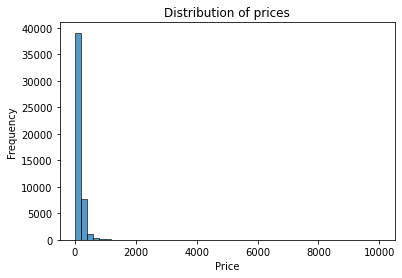

In [ ]:
sns.histplot(df.price, bins=50)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')
plt.show()

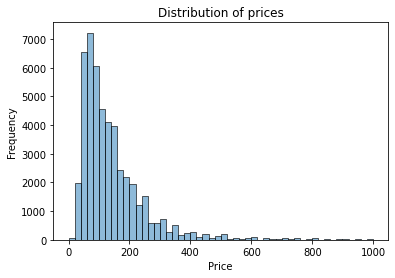

In [ ]:
sns.histplot(df.price[df.price < 1000], bins=50)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')
plt.show()

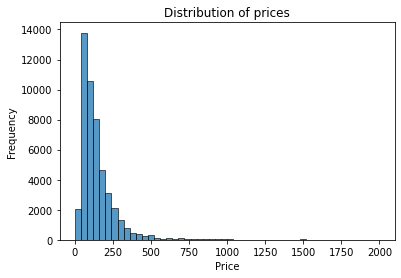

In [ ]:
sns.histplot(df.price[df.price < 2000], bins=50)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')
plt.show()

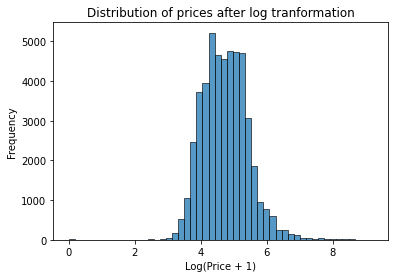

In [ ]:
log_price = np.log1p(df.price)
sns.histplot(log_price, bins=50)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')
plt.show()

## Homework

### Question 1
##### Find a feature with missing values. How many missing values does it have?

In [ ]:
df[features].isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df['reviews_per_month'].isnull().sum()

10052

### Question 2
##### What's the median (50% percentile) for variable 'minimum_nights'?

In [ ]:
median_minimum_nights = df['minimum_nights'].median()
median_minimum_nights

3.0

### Split the data
#####Shuffle the initial dataset, use seed 42.

*   Split your data in train/val/test sets, with 60%/20%/20% distribution.
*   Make sure that the target value ('price') is not in your dataframe.
*   Apply the log transformation to the price variable using the np.log1p() function.

In [ ]:
df_shuffled = df
n = len(df_shuffled)

np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_shuffled.iloc[idx]
df_shuffled

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
879,317905,come_and_go_as__you_please_in_bkln!,1631733,jane,brooklyn,kensington,40.64354,-73.97777,entire_home/apt,89,3,62,2019-01-02,0.71,1,189
44383,34205267,"spacious,_sunny_room_in_queens/brooklyn",913940,giancarlo,queens,ridgewood,40.70666,-73.90779,private_room,30,21,0,NaN,NaN,1,73
15394,12342297,private_bedroom_in_high-ceiling_4br_apartment!,19953913,alejandro,manhattan,hell's_kitchen,40.76116,-73.99016,private_room,120,2,17,2017-04-28,0.43,1,0
43230,33527778,sonder_|_stock_exchange_|_stunning_3br_+_kitchen,219517861,sonder_(nyc),manhattan,financial_district,40.70763,-74.01050,entire_home/apt,470,2,5,2019-06-02,1.88,327,272
16332,13136376,spacious_2_bedroom_with_balcony,16110448,gingie,manhattan,east_harlem,40.79658,-73.93287,entire_home/apt,199,2,30,2019-06-03,0.80,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,8754339,gran_fondo_cyclist_haven,20261309,sarah,manhattan,washington_heights,40.84650,-73.94319,shared_room,60,1,0,NaN,NaN,1,0
44732,34383329,"a_private_bedroom_in_chelsea_,_manhattan.",53254710,aamito,manhattan,chelsea,40.73957,-74.00082,private_room,85,2,4,2019-06-30,1.90,1,76
38158,30109697,nicely_appointed_big_one_bedroom_off_central_park,1385157,brian,manhattan,upper_west_side,40.78318,-73.97372,entire_home/apt,130,30,1,2019-04-12,0.34,5,261
860,304799,penthouse_studio_by_central_park,185753,carolyn,manhattan,upper_west_side,40.77508,-73.97990,entire_home/apt,150,2,11,2019-06-09,0.13,1,2


In [ ]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_train, n_val, n_test

(29337, 9779, 9779)

In [ ]:
df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train+n_val]
df_test = df_shuffled.iloc[n_train+n_val:]

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']

df_train

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,317905,come_and_go_as__you_please_in_bkln!,1631733,jane,brooklyn,kensington,40.64354,-73.97777,entire_home/apt,3,62,2019-01-02,0.71,1,189
1,34205267,"spacious,_sunny_room_in_queens/brooklyn",913940,giancarlo,queens,ridgewood,40.70666,-73.90779,private_room,21,0,NaN,NaN,1,73
2,12342297,private_bedroom_in_high-ceiling_4br_apartment!,19953913,alejandro,manhattan,hell's_kitchen,40.76116,-73.99016,private_room,2,17,2017-04-28,0.43,1,0
3,33527778,sonder_|_stock_exchange_|_stunning_3br_+_kitchen,219517861,sonder_(nyc),manhattan,financial_district,40.70763,-74.01050,entire_home/apt,2,5,2019-06-02,1.88,327,272
4,13136376,spacious_2_bedroom_with_balcony,16110448,gingie,manhattan,east_harlem,40.79658,-73.93287,entire_home/apt,2,30,2019-06-03,0.80,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29332,11923007,trendy_&_spacious_williamsburg_apt,7640852,markus,brooklyn,williamsburg,40.71178,-73.95779,private_room,2,0,NaN,NaN,1,0
29333,11581737,1_bedroom_apt_-_near_central_park,196298,hiershenee_b.,manhattan,upper_west_side,40.78638,-73.97004,entire_home/apt,30,10,2019-01-08,0.40,1,0
29334,19717723,tiny_studio_in_eastvillage,49656804,marija,manhattan,east_village,40.72716,-73.98524,entire_home/apt,3,75,2019-07-01,3.12,1,60
29335,24489174,"comfortable,spacious,clean_private_room",184523531,june,manhattan,east_harlem,40.79578,-73.94523,private_room,2,31,2019-06-23,2.10,1,265


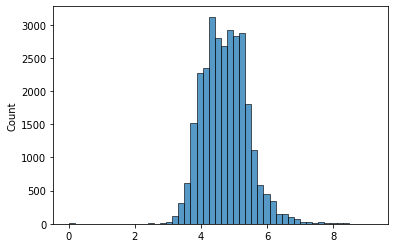

In [ ]:
sns.histplot(y_train, bins=50)

### Question 3
*   We need to deal with missing values for the column from Q1.
*   We have two options: fill it with 0 or with the mean of this variable.
*   Try both options. For each, train a linear regression model without regularization using the code from the lessons.
*   For computing the mean, use the training only!
*   Use the validation dataset to evaluate the models and compare the RMSE of each option.
*   Round the RMSE scores to 2 decimal digits using round(score, 2)
##### Which option gives better RMSE?



In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

def prepare_X(df , to_fill_with):
    df_num = df[base]
    df_num = df_num.fillna(to_fill_with)
    X = df_num.values
    return X

def rmse(y , y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [ ]:
base = ['latitude','longitude','minimum_nights',
'number_of_reviews','reviews_per_month',
'calculated_host_listings_count','availability_365']

In [ ]:
# Fill missing values with 0
X_train = prepare_X(df_train , 0)
w0 , w = train_linear_regression(X_train , y_train)
w0 , w

(-419.91265807142094,
 array([ 1.30676225e+00, -5.02167854e+00, -5.59803109e-04, -4.07634896e-04,
        -8.25470069e-03,  1.33371320e-03,  6.50203890e-04]))

In [ ]:
# Evaluate the model using validation dataset
X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)

# Calculate RMSE for 1st option (filling missing values with 0)
score = rmse(y_val , y_pred)
round(score , 2)

0.64

In [ ]:
# Calculate mean of train dataset (for filling missing values)
mean = df_train['reviews_per_month'].mean()
mean

1.3685492094777056

In [ ]:
# Fill missing values with mean
X_train = prepare_X(df_train , mean)
w0 , w = train_linear_regression(X_train , y_train)
w0, w

(-423.5393076139524,
 array([ 1.31148321e+00, -5.06799071e+00, -4.87741552e-04, -6.63849280e-04,
         5.34563271e-03,  1.32706020e-03,  6.38794182e-04]))

In [ ]:
# Evaluate the model using validation dataset
X_val = prepare_X(df_val, mean)
y_pred = w0 + X_val.dot(w)

# Calculate RMSE for 2nd option (filling missing values with mean)
score = rmse(y_val , y_pred)
round(score , 2)

0.64

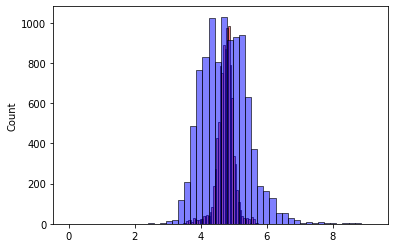

In [ ]:
# Both RMSE have the same value: 0.64
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

### Question 4
Now let's train a regularized linear regression.

*   For this question, fill the NAs with 0.
*   Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
*   Use RMSE to evaluate the model on the validation dataset.
*   Round the RMSE scores to 2 decimal digits.

##### Which r gives the best RMSE?

In [ ]:
def train_linear_regression_reg(X, y ,r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + (r*np.eye(XTX.shape[0]))
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train , 0)
    w0 , w = train_linear_regression_reg(X_train , y_train , r)

    X_val = prepare_X(df_val , 0)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val , y_pred)
    round(score , 2)
    print('%6s' %r ,w0 ,round(score,2))

     0 -419.91265807142094 0.64
 1e-06 -419.8627153336333 0.64
0.0001 -414.97649233703777 0.64
 0.001 -375.27365241862066 0.64
  0.01 -191.78384049339815 0.66
   0.1 -32.56256054966786 0.68
     1 -3.4992168354209157 0.68
     5 -0.7033623171188026 0.68
    10 -0.35127675921831375 0.68


##### 0.001 is the optimal one for r value.



### Question 5

*   We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
*   Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
*   For each seed, do the train/validation/test split with 60%/20%/20% distribution.
*   Fill the missing values with 0 and train a model without regularization.
*   For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
##### What's the standard deviation of all the scores? To compute the standard deviation, use np.std
##### Round the result to 3 decimal digits (round(std, 3))

In [ ]:
arr = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_shuffled = df
    n = len(df_shuffled)

    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df_shuffled.iloc[idx]
    n_val = int(n*0.2)
    n_test = int(n*0.2)
    n_train = n - n_val - n_test

    df_train = df_shuffled.iloc[:n_train]
    df_val = df_shuffled.iloc[n_train:n_train+n_val]
    df_test = df_shuffled.iloc[n_train+n_val:]
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)

    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    X_train = prepare_X(df_train , 0)
    w0 , w = train_linear_regression(X_train , y_train)

    X_val = prepare_X(df_val , 0)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val , y_pred)
    arr.append(round(score , 2))

In [ ]:
arr

[0.65, 0.65, 0.65, 0.64, 0.64, 0.63, 0.63, 0.65, 0.65, 0.64]

In [ ]:
# Calculate standard deviation of all scores
round(np.std(arr),3)

0.008

### Question 6
*   Split the dataset like previously, use seed 9.
*   Combine train and validation datasets.
*   Fill the missing values with 0 and train a model with r=0.001.
##### What's the RMSE on the test dataset?

In [ ]:
#Randomize dataset using seed 9
np.random.seed(9)
df_shuffled =df
n = len(df_shuffled)
idx = np.arange(n)
np.random.shuffle(idx)

# Split data in train/val/test sets, with 60%/20%/20% distribution
df_shuffled = df_shuffled.iloc[idx[0:n]]

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test
 
df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train+n_val]
df_test = df_shuffled.iloc[n_train+n_val:]

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

# Combine the train and validation datasets
df_full_train = pd.concat([df_train , df_val])
df_full_train = df_full_train.reset_index(drop = True)
    
y_full_train = np.log1p(df_full_train.price.values)
    
del df_train['price']
del df_val['price']
del df_test['price']
del df_full_train ['price']

In [ ]:
# Training the model
r = 0.001
X_full_train = prepare_X(df_full_train , 0)
w0 , w = train_linear_regression_reg(X_full_train , y_full_train , r)

# Calculate RMSE on test datatest
X_test = prepare_X(df_test , 0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test , y_pred)
score

0.6452771348554612

In [ ]:
# Rounding RMSE
round(score , 2)

0.65